# Section 2: Cloud-based machine learning

> <font color=red>**Note:**</font> The `azureml` package presently works only with Python 2. If your notebook is not currently running Python 2, change it in the menu at the top of the notebook by clicking **Kernel > Change kernel > Python 2**.

## Create and connect to an Azure ML Studio workspace

The `azureml` package is installed by default with Azure Notebooks, so we don't have to worry about that. It uses an Azure ML Studio workspace ID and authorization token to connect your notebook to the workspace; you will obtain the ID and token by following these steps:

1. Open [Azure ML Studio](https://studio.azureml.net) in a new browser tab and sign in with a Microsoft account. Azure ML Studio is free and does not require an Azure subscription. Once signed in with your Microsoft account (the same credentials you’ve used for Azure Notebooks), you're in your “workspace.”

2. On the left pane, click **Settings**.

    ![Settings button](https://github.com/Microsoft/AzureNotebooks/blob/master/Samples/images/azure-ml-studio-settings.png?raw=true)<br/><br/>

3. On the **Name** tab, the **Workspace ID** field contains your workspace ID. Copy that ID into the `workspace_id` value in the code cell in Step 5 of the notebook below.

    ![Location of workspace ID](https://github.com/Microsoft/AzureNotebooks/blob/master/Samples/images/azure-ml-studio-workspace-id.png?raw=true)<br/><br/>

4. Click the **Authorization Tokens** tab, and then copy either token into the `authorization_token` value in the code cell in Step 5 of the notebook.

    ![Location of authorization token](https://github.com/Microsoft/AzureNotebooks/blob/master/Samples/images/azure-ml-studio-tokens.png?raw=true)<br/><br/>

5. 5.	Run the code cell below; if it runs without error, you're ready to continue.

In [ ]:
from azureml import Workspace

# Replace the values with those from your own Azure ML Studio instance; see Prerequisites
# The workspace_id is a string of hexadecimal characters; the token is a long string of random characters.

workspace_id = 'c758c579b4c14e1e9705f1dc22e5a6d5'

authorization_token = 'F1C0QVU+TenwVavYQUNdwTxnd1wL0thqFdbxQwpOlPYEmVJURVhjoPc+GGqOkzUg7FQF5EZm/1dSzVRlXf1umA=='

ws = Workspace(workspace_id, authorization_token)

## Explore forest fire data

Let’s look at a meteorological dataset collected by Cortez and Morais for 2007 to study the burned area of forest fires in the northeast region of Portugal.

> P. Cortez and A. Morais. A Data Mining Approach to Predict Forest Fires using Meteorological Data. 
  In J. Neves, M. F. Santos and J. Machado Eds., New Trends in Artificial Intelligence, 
  Proceedings of the 13th EPIA 2007 - Portuguese Conference on Artificial Intelligence, December, 
  Guimaraes, Portugal, pp. 512-523, 2007. APPIA, ISBN-13 978-989-95618-0-9. 

The dataset contains the following features:

- **`X`**: x-axis spatial coordinate within the Montesinho park map: 1 to 9
- **`Y`**: y-axis spatial coordinate within the Montesinho park map: 2 to 9
- **`month`**: month of the year: "1" to "12" jan-dec
- **`day`**: day of the week: "1" to "7" sun-sat
- **`FFMC`**: FFMC index from the FWI system: 18.7 to 96.20
- **`DMC`**: DMC index from the FWI system: 1.1 to 291.3 
- **`DC`**: DC index from the FWI system: 7.9 to 860.6 
- **`ISI`**: ISI index from the FWI system: 0.0 to 56.10
- **`temp`**: temperature in Celsius degrees: 2.2 to 33.30
- **`RH`**: relative humidity in %: 15.0 to 100
- **`wind`**: wind speed in km/h: 0.40 to 9.40 
- **`rain`**: outside rain in mm/m2 : 0.0 to 6.4 
- **`area`**: the burned area of the forest (in ha): 0.00 to 1090.84 


Let's load the dataset and visualize the area that was burned in relation to the temperature in that region.

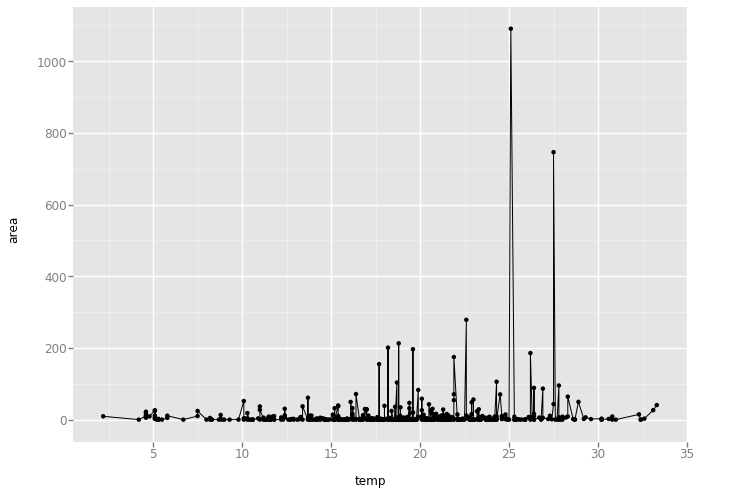

<ggplot: (8747376730181)>

In [2]:
import pandas as pd
df = pd.DataFrame(pd.read_csv('Data/forestfires.csv'))
%matplotlib inline
from ggplot import *
ggplot(aes(x='temp', y='area'), data=df) +  geom_line() + geom_point()

Intuitively, the hotter the weather, the more hectares burned in forest fires.

## Transfer your data to Azure ML Studio

`azureml` enables us to load data and models into Azure ML Studio from an Azure Notebook (or any Python environment).

The first code cell of this notebook is what establishes the connection with *your* Azure ML Studio account.

In [3]:
from azureml import DataTypeIds

dataset = ws.datasets.add_from_dataframe(
              dataframe=df,
              data_type_id=DataTypeIds.GenericCSV,
              name='Forest Fire Data',
              description='Paulo Cortez and Aníbal Morais (Univ. Minho) @ 2007'
          )

AzureMLConflictHttpError: {"Error":{"Code":"UserError","Message":"Duplicate found for asset name: workspace: c758c579b4c14e1e9705f1dc22e5a6d5","Target":null,"Details":[],"InnerError":null,"DebugInfo":null}}

After running the code above, you can see the dataset listed in the **Datasets** section of the Azure Machine Learning Studio workspace. (**Note**: You might need to switch between browser tabs and refresh the page in order to see the dataset.)

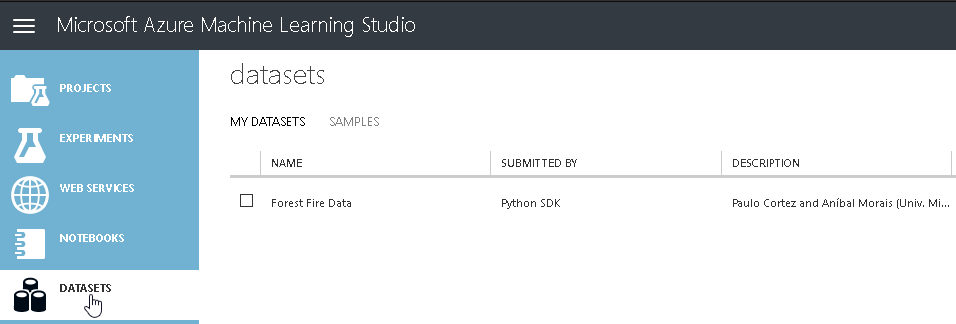<br/>

**View Azure ML Studio Data in Notebooks**

In [4]:
print('\n'.join([i.name for i in ws.datasets if not i.is_example])) # only list user-created datasets

Contoso Mart User Behaviors
Contoso Mart Product Features
Contoso Mart User Features
Forest Fire Data


**Interact with Azure ML Studio Data in Notebooks**

In [5]:
# Read some more of the metadata
ds = ws.datasets['Forest Fire Data']
print(ds.name)
print(ds.description)
print(ds.family_id)
print(ds.data_type_id)
print(ds.created_date)
print(ds.size)

# Read the contents
df2 = ds.to_dataframe()
df2.head()

Forest Fire Data
Paulo Cortez and Aníbal Morais (Univ. Minho) @ 2007
f3abd01c923644ddb3815337839548dd
GenericCSV
2019-09-17 23:32:51.600000
25557


X  Y  month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5      3    6  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4     10    3  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4     10    7  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  6      3    6  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  8  6      3    1  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0

## Create your model

We're now back into familiar territory: prepping data for the model and fitting the model. To keep it interesting, we'll use the scikit-learn `train_test_split()` function with a slight change of parameters to select 75 percent of the data points for training and 25 percent for validation (testing).

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
        df[['wind','rain','month','RH']],
        df['temp'],
        test_size=0.25,
        random_state=42
    )

Did you see what we did there? Rather than select all of the variables for the model, we were more selective and just chose windspeed, rainfall, month, and relative humidity in order to predict temperature.

Fit scikit-learn's `DecisionTreeRegressor` model using the training data. This algorithm is a combination of the linear regression and decision tree classification that you worked with in Section 6.

In [7]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)
y_test_predictions = regressor.predict(X_test)
print('R^2 for true vs. predicted test set forest temperature: {:0.2f}'.format(r2_score(y_test, y_test_predictions)))

R^2 for true vs. predicted test set forest temperature: 0.63


### Exercise:

In [8]:
# Play around with this algorithm. 
# Can you get better results changing the variables you select for the training and test data?
# What if you look at different variables for the response?


## Deploy your model as a web service

**Access your Model Anywhere**

This is the important part. Once deployed as a web service, your model can be accessed from anywhere. This means that rather than refit a model every time you need a new prediction for a business or humanitarian use case, you can send the data to the pre-fitted model and get back a prediction.

First, deploy the model as a predictive web service. To do so, create a wrapper function that takes input data as an argument and calls `predict()` with your trained model and this input data, returning the results.

In [9]:
from azureml import services

@services.publish(workspace_id, authorization_token)
@services.types(wind=float, rain=float, month=int, RH=float)
@services.returns(float)

# The name of your web service is set to this function's name
def forest_fire_predictor(wind, rain, month, RH):
    return regressor.predict([wind, rain, month, RH])

# Hold onto information about your web service so 
# you can call it within the notebook later
service_url = forest_fire_predictor.service.url 
api_key = forest_fire_predictor.service.api_key
help_url = forest_fire_predictor.service.help_url
service_id = forest_fire_predictor.service.service_id

You can also go to the **Web Services** section of your Azure ML Studio workspace to see the predictive web service running there.

## Consuming the web service

Next, consume the web service. To see if this works, try it here from the notebook session in which the web service was created. Just call the predictor directly:

In [10]:
forest_fire_predictor.service(5.4, 0.2, 9, 22.1)

26.4

At any later time, you can use the stored API key and service URL to call the service. In the example below, data can be packaged in JavaScript Object Notation (JSON) format and sent to the web service.

In [ ]:
import urllib2
import json

data = {"Inputs": { 
            "input1": {
                "ColumnNames": [ "wind", "rain", "month", "RH"],
                "Values": [["5.4", "0.2", "9", "22.1"]] 
            }
        }, # Specified feature values
        
        "GlobalParameters": {}
    }

body = json.dumps(data)
headers = {'Content-Type':'application/json', 'Authorization':('Bearer '+ api_key)}
req = urllib2.Request(service_url, body, headers) 

try:
    response = urllib2.urlopen(req)
    result = json.loads(response.read())  # load JSON-formatted string response as dictionary
    print(result['Results']['output1']['value']['Values'][0][0]) # Get the returned prediction
    
except urllib2.HTTPError, error:
    print("The request failed with status code: " + str(error.code))
    print(error.info())
    print(json.loads(error.read()))         

### Exercise:

Try this same process of training and hosting a model through Azure ML Studio with the Pima Indians Diabetes dataset (in CSV format in your Data folder). The dataset has nine columns; use any of the eight features you see fit to try and predict the ninth column, Outcome (1 = diabetes, 0 = no diabetes).

> **Takeaway**: In this part, you explored fitting a model and deploying it as a web service. You did this by using now-familiar tools in an Azure Notebook to build a model relating variables surrounding forest fires and then posting that as a function in Azure ML Studio. From there, you saw how you and others can access the pre-fitted models to make predictions on new data from anywhere on the web.